<a href="https://colab.research.google.com/github/Arpan255/CodeClauseInternship_Mask-Detection/blob/main/Mask.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
import random
import shutil
with_mask_dir = '/content/drive/MyDrive/data/with_mask'
without_mask_dir = '/content/drive/MyDrive/data/without_mask'
os.makedirs('data/train/with_mask', exist_ok=True)
os.makedirs('data/train/without_mask', exist_ok=True)
os.makedirs('data/validation/with_mask', exist_ok=True)
os.makedirs('data/validation/without_mask', exist_ok=True)
os.makedirs('data/test/with_mask', exist_ok=True)
os.makedirs('data/test/without_mask', exist_ok=True)


train_split = 0.7
val_split = 0.15
test_split = 0.15


with_mask_images = [f for f in os.listdir(with_mask_dir) if f.endswith('.jpg')]
without_mask_images = [f for f in os.listdir(without_mask_dir) if f.endswith('.jpg')]

random.shuffle(with_mask_images)
random.shuffle(without_mask_images)

num_with_mask = len(with_mask_images)
num_without_mask = len(without_mask_images)

num_train_with_mask = int(train_split * num_with_mask)
num_train_without_mask = int(train_split * num_without_mask)

num_val_with_mask = int(val_split * num_with_mask)
num_val_without_mask = int(val_split * num_without_mask)

for i, image_file in enumerate(with_mask_images):
    if i < num_train_with_mask:
        split_dir = 'train'
    elif i < num_train_with_mask + num_val_with_mask:
        split_dir = 'validation'
    else:
        split_dir = 'test'

    source_path = os.path.join(with_mask_dir, image_file)
    destination_path = os.path.join('data', split_dir, 'with_mask', image_file)

    shutil.copyfile(source_path, destination_path)

for i, image_file in enumerate(without_mask_images):
    if i < num_train_without_mask:
        split_dir = 'train'
    elif i < num_train_without_mask + num_val_without_mask:
        split_dir = 'validation'
    else:
        split_dir = 'test'

    source_path = os.path.join(without_mask_dir, image_file)
    destination_path = os.path.join('data', split_dir, 'without_mask', image_file)

    shutil.copyfile(source_path, destination_path)

print("Data splitting and directory creation completed.")


Data splitting and directory creation completed.


In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.models import Sequential

img_height, img_width = 150, 150
train_data_dir = 'data/train'
valid_data_dir = 'data/validation'
test_data_dir = 'data/test'

train_datagen = ImageDataGenerator(
    rescale=1.0/255.0,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

valid_datagen = ImageDataGenerator(rescale=1.0/255.0)
test_datagen = ImageDataGenerator(rescale=1.0/255.0)

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_height, img_width),
    batch_size=32,
    class_mode='binary'
)

valid_generator = valid_datagen.flow_from_directory(
    valid_data_dir,
    target_size=(img_height, img_width),
    batch_size=32,
    class_mode='binary'
)

test_generator = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=(img_height, img_width),
    batch_size=32,
    class_mode='binary'
)
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(img_height, img_width, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

history = model.fit(
    train_generator,
    epochs=10,
    validation_data=valid_generator
)
test_loss, test_accuracy = model.evaluate(test_generator)
print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}")


Found 5492 images belonging to 2 classes.
Found 1176 images belonging to 2 classes.
Found 1179 images belonging to 2 classes.
Epoch 1/10
 15/172 [=>............................] - ETA: 5:10 - loss: 0.9321 - accuracy: 0.5876

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


172/172 [==============================] - 377s 2s/step - loss: 0.4810 - accuracy: 0.7915 - val_loss: 0.2964 - val_accuracy: 0.8869
Epoch 2/10
172/172 [==============================] - 368s 2s/step - loss: 0.3583 - accuracy: 0.8481 - val_loss: 0.2239 - val_accuracy: 0.9099
Epoch 3/10
172/172 [==============================] - 361s 2s/step - loss: 0.3023 - accuracy: 0.8800 - val_loss: 0.2066 - val_accuracy: 0.9226
Epoch 4/10
172/172 [==============================] - 371s 2s/step - loss: 0.2737 - accuracy: 0.8920 - val_loss: 0.2113 - val_accuracy: 0.9158
Epoch 5/10
172/172 [==============================] - 365s 2s/step - loss: 0.2572 - accuracy: 0.8949 - val_loss: 0.1762 - val_accuracy: 0.9294
Epoch 6/10
172/172 [==============================] - 366s 2s/step - loss: 0.2519 - accuracy: 0.9037 - val_loss: 0.1733 - val_accuracy: 0.9371
Epoch 7/10
172/172 [==============================] - 370s 2s/step - loss: 0.2393 - accuracy: 0.9110 - val_loss: 0.1733 - val_accuracy: 0.9294
Epoch 8/10

1/1 [==============================] - 0s 41ms/step
Mask detected with probability: 95.40473483502865


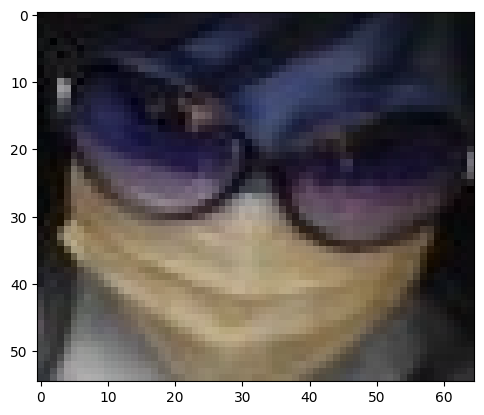

In [ ]:
import numpy as np
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import cv2
test_image_path = '/content/data/train/with_mask/with_mask_1102.jpg'
x=cv2.imread('/content/data/train/with_mask/with_mask_1102.jpg')
plt.imshow(x)

test_image = image.load_img(test_image_path, target_size=(img_height, img_width))
test_image = image.img_to_array(test_image)

test_image = np.expand_dims(test_image, axis=0) / 255.0
prediction = model.predict(test_image)

if prediction[0][0] < 0.5:
    print("Mask detected with probability:", (1-prediction[0][0])*100)
else:
    print("No mask detected with probability:", (prediction[0][0])*100)


1/1 [==============================] - 0s 41ms/step
No mask detected with probability: 98.295658826828


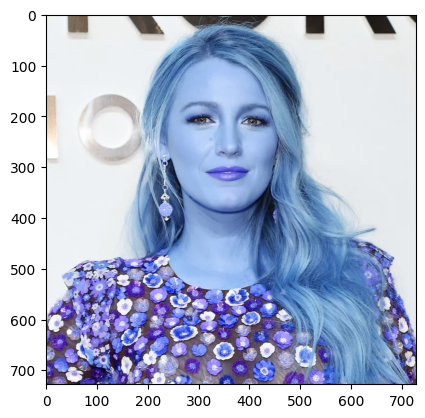

In [ ]:
import numpy as np
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import cv2
test_image_path = '/Blake-Lively.jpg'
x=cv2.imread('/Blake-Lively.jpg')
plt.imshow(x)

test_image = image.load_img(test_image_path, target_size=(img_height, img_width))
test_image = image.img_to_array(test_image)

test_image = np.expand_dims(test_image, axis=0) / 255.0
prediction = model.predict(test_image)

if prediction[0][0] < 0.5:
    print("Mask detected with probability:", (1-prediction[0][0])*100)
else:
    print("No mask detected with probability:", (prediction[0][0])*100)
